# Simulations numériques

In [1]:
from SimulateurRetraites import SimulateurRetraites
from SimulateurAnalyse import SimulateurAnalyse
import pylab as pl

## Hypothèses : conjoncture

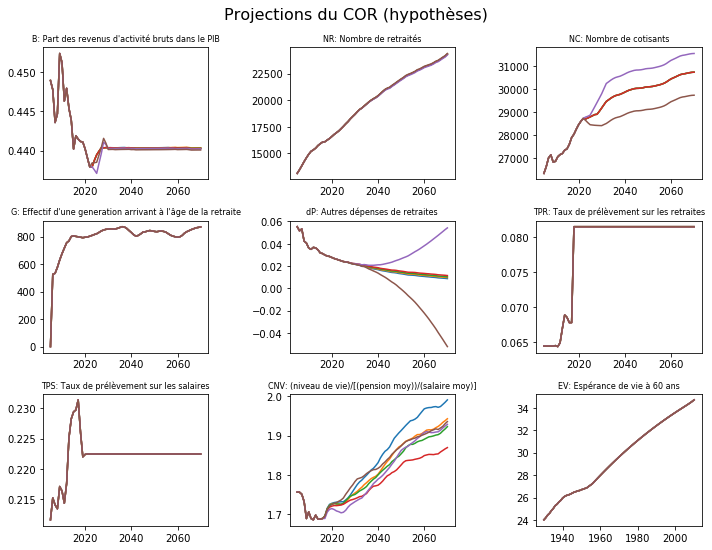

In [2]:
simulateur = SimulateurRetraites('retraites/fileProjection.json')

analyse = simulateur.pilotageCOR()

pl.figure(figsize=(10,8))
pl.suptitle(u"Projections du COR (hypothèses)",fontsize=16)
for c in range(9):
    pl.subplot(3,3,c+1)
    v,V = [ (simulateur.B,'B'), (simulateur.NR,'NR'), (simulateur.NC,'NC'), \
            (simulateur.G,'G'), (simulateur.dP,'dP'), (simulateur.TCR,'TPR'), 
            (simulateur.TCS,'TPS'), (simulateur.CNV,'CNV'), (simulateur.EV,'EV') ][c]
    analyse.graphique(v,V)
pl.tight_layout(rect=[0, 0.03, 1, 0.95])    

## Statu quo (COR)

Cette stratégie de pilotage est celle du COR en 2019. 

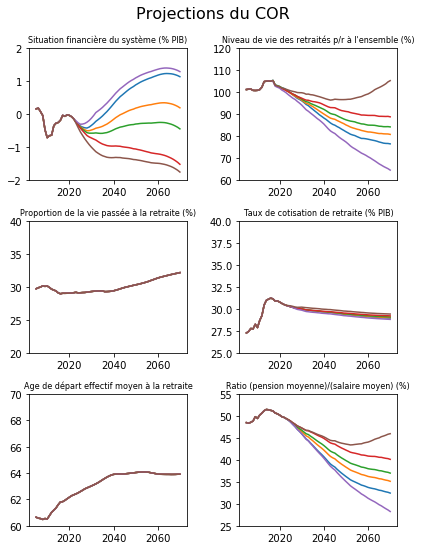

In [3]:
simulateur = SimulateurRetraites('retraites/fileProjection.json')

analyse = simulateur.pilotageCOR()

pl.figure(figsize=(6,8))
pl.suptitle('Projections du COR',fontsize=16)
analyse.graphiques()

## Pilotage 1 : calcul à âge et niveau de vie défini

Cette stratégie de pilotage impose :
* l'équilibre financier, 
* le maintien du niveau de vie par rapport à l'ensemble de la population, 
* le départ à un âge donné.


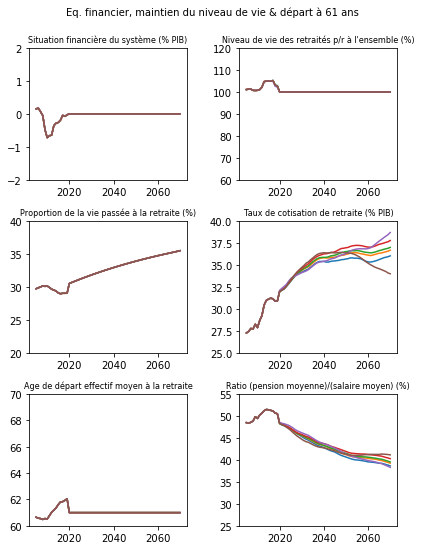

In [4]:
S = 0.0
age = 61
RNV = 1.0

simulateur = SimulateurRetraites('retraites/fileProjection.json')
analyse = simulateur.pilotageParAgeEtNiveauDeVie(age, RNV, S)

pl.figure(figsize=(6,8))
if age!=0:
    pl.suptitle( (u"Eq. financier, maintien du niveau de vie & départ à %d ans"%(age)),fontsize=10)
else:
    pl.suptitle(u"Equilibre financier & maintien du niveau de vie",fontsize=10)
        
analyse.graphiques()

analyse.mysavefig("cotisations")

## Pilotage 2 : calcul à cotisations et pensions définies

Cette stratégie de pilotage impose :
* l'équilibre financier, 
* le maintien du niveau des pensions par rapport aux salaires,
* le taux de cotisations.

Le rapport (pension moyenne)/(salaire moyen) est maintenu constant et égal à celui de 2020.

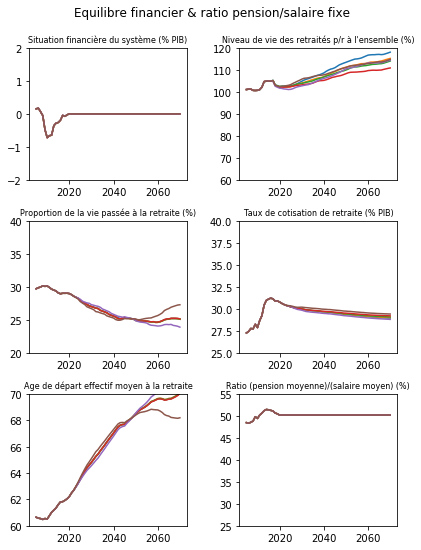

In [5]:
Ps=0
Ts=0

simulateur = SimulateurRetraites('retraites/fileProjection.json')
pl.figure(figsize=(6,8))
pl.suptitle(u'Equilibre financier & ratio pension/salaire fixe',fontsize=12)
            
analyse = simulateur.pilotageParCotisationsEtPensions(Ps,Ts)
    
analyse.graphiques()

In [6]:
print("Maintien du rapport pension moyenne / salaire moyen")
analyse.affiche_solutions_simulateur_COR()

Maintien du rapport pension moyenne / salaire moyen
Valeur à rentrer sur le simulateur officiel du COR:

Scenario 1 :  Hausse des salaires: +1,8%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 62.2 ans, 30.8 %, 50.2 %
 2025 : 63.5 ans, 30.2 %, 50.2 %
 2030 : 64.8 ans, 30.0 %, 50.2 %
 2040 : 67.0 ans, 29.7 %, 50.2 %
 2050 : 68.5 ans, 29.4 %, 50.2 %
 2060 : 69.6 ans, 29.1 %, 50.2 %
 2070 : 70.1 ans, 28.9 %, 50.2 %

Scenario 2 :  Hausse des salaires: +1,5%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 62.2 ans, 30.8 %, 50.2 %
 2025 : 63.5 ans, 30.2 %, 50.2 %
 2030 : 64.8 ans, 30.0 %, 50.2 %
 2040 : 67.0 ans, 29.7 %, 50.2 %
 2050 : 68.5 ans, 29.4 %, 50.2 %
 2060 : 69.7 ans, 29.1 %, 50.2 %
 2070 : 70.1 ans, 29.0 %, 50.2 %

Scenario 3 :  Hausse des salaires: +1,3%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 62.2 ans, 30.8 %, 50.2 %
 2025 : 63.5 ans, 30.2 %, 50.2 %
 2030 : 64.8 ans, 30.0 %, 50.2 %
 2040 : 67.0 ans, 29.7 %, 50.2 %

## Pilotage 3 : calcul à cotisations et niveau de vie défini

Cette stratégie de pilotage impose :
* l'équilibre financier, 
* le maintien du niveau de vie des retraités par rapport à l'ensemble de la population,
* le taux de cotisations. 


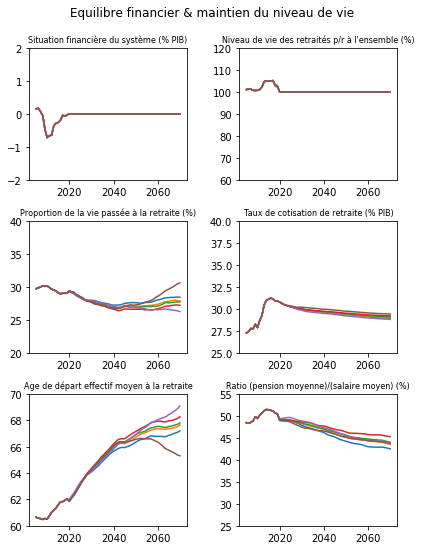

In [7]:
Ts=0 # Utilise le taux de cotisations du COR
RNV=1.0

simulateur = SimulateurRetraites('retraites/fileProjection.json')
analyse = simulateur.pilotageParNiveauDeVieEtCotisations(Ts,RNV)
    
pl.figure(figsize=(6,8))
pl.suptitle(u'Equilibre financier & maintien du niveau de vie',fontsize=12)
analyse.graphiques()
analyse.mysavefig("macron_niveau_de_vie")

In [8]:
print("Maintien du niveau de vie")
analyse.affiche_solutions_simulateur_COR()

Maintien du niveau de vie
Valeur à rentrer sur le simulateur officiel du COR:

Scenario 1 :  Hausse des salaires: +1,8%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 61.8 ans, 30.8 %, 49.0 %
 2025 : 63.1 ans, 30.2 %, 48.9 %
 2030 : 64.1 ans, 30.0 %, 47.9 %
 2040 : 65.7 ans, 29.7 %, 46.2 %
 2050 : 66.3 ans, 29.4 %, 44.3 %
 2060 : 66.8 ans, 29.1 %, 43.0 %
 2070 : 67.2 ans, 28.9 %, 42.5 %

Scenario 2 :  Hausse des salaires: +1,5%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 61.9 ans, 30.8 %, 49.0 %
 2025 : 63.2 ans, 30.2 %, 49.0 %
 2030 : 64.2 ans, 30.0 %, 48.3 %
 2040 : 65.9 ans, 29.7 %, 47.0 %
 2050 : 66.7 ans, 29.4 %, 45.2 %
 2060 : 67.4 ans, 29.1 %, 44.3 %
 2070 : 67.7 ans, 29.0 %, 43.6 %

Scenario 3 :  Hausse des salaires: +1,3%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 61.9 ans, 30.8 %, 49.0 %
 2025 : 63.2 ans, 30.2 %, 49.0 %
 2030 : 64.2 ans, 30.0 %, 48.4 %
 2040 : 66.0 ans, 29.7 %, 47.0 %
 2050 : 66.9 ans, 29.4 %,

## Pilotage 4 : calcul à cotisations et âge définis

Cette stratégie de pilotage impose :
* l'équilibre financier, 
* un âge de départ à la retraite donné,
* un taux de cotisations donné.


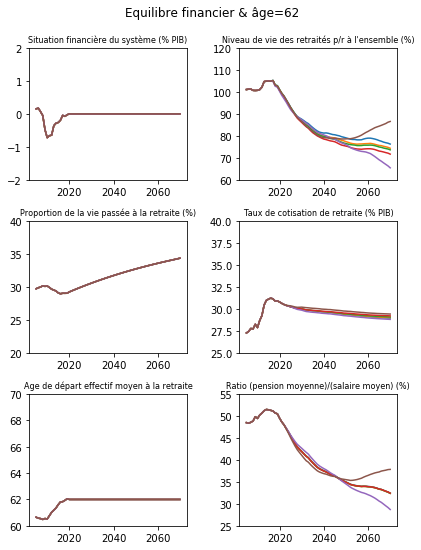

In [9]:
Acible = 62 # Age de départ à la retraite

simulateur = SimulateurRetraites('retraites/fileProjection.json')
analyse = simulateur.pilotageParCotisationsEtAge(62) 
    
pl.figure(figsize=(6,8))
pl.suptitle(u'Equilibre financier & âge=%d'% (Acible),fontsize=12)
analyse.graphiques()
analyse.mysavefig("pilotage4_age")

In [10]:
print("Pilotage 4 : age = %d ans" % (Acible))
analyse.affiche_solutions_simulateur_COR()

Pilotage 4 : age = 62 ans
Valeur à rentrer sur le simulateur officiel du COR:

Scenario 1 :  Hausse des salaires: +1,8%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 62.0 ans, 30.8 %, 49.5 %
 2025 : 62.0 ans, 30.2 %, 45.5 %
 2030 : 62.0 ans, 30.0 %, 41.9 %
 2040 : 62.0 ans, 29.7 %, 37.6 %
 2050 : 62.0 ans, 29.4 %, 35.0 %
 2060 : 62.0 ans, 29.1 %, 34.0 %
 2070 : 62.0 ans, 28.9 %, 32.4 %

Scenario 2 :  Hausse des salaires: +1,5%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 62.0 ans, 30.8 %, 49.5 %
 2025 : 62.0 ans, 30.2 %, 45.5 %
 2030 : 62.0 ans, 30.0 %, 41.9 %
 2040 : 62.0 ans, 29.7 %, 37.5 %
 2050 : 62.0 ans, 29.4 %, 34.9 %
 2060 : 62.0 ans, 29.1 %, 33.9 %
 2070 : 62.0 ans, 29.0 %, 32.4 %

Scenario 3 :  Hausse des salaires: +1,3%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 62.0 ans, 30.8 %, 49.5 %
 2025 : 62.0 ans, 30.2 %, 45.4 %
 2030 : 62.0 ans, 30.0 %, 41.9 %
 2040 : 62.0 ans, 29.7 %, 37.5 %
 2050 : 62.0 ans, 29.4 %,

## Articles mediapart

Pilotage 3 : calcul à cotisations et niveau de vie défini.

Données et figure pour article 2


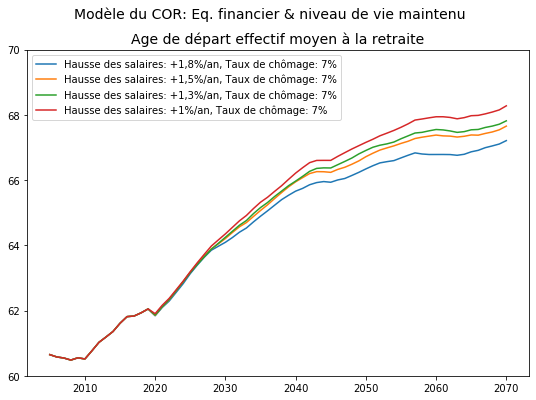

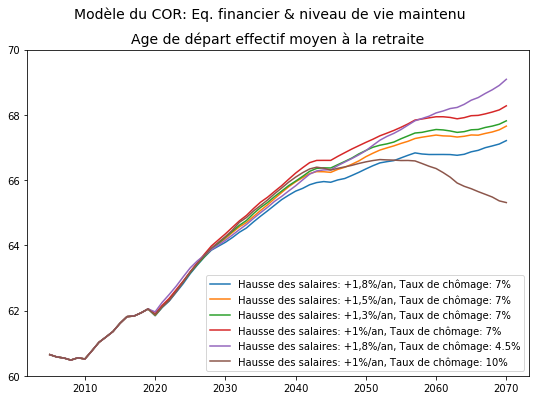

In [11]:
simulateur = SimulateurRetraites('retraites/fileProjection.json')
print("Données et figure pour article 2")

Tcible = 0
analyse = simulateur.pilotageParNiveauDeVieEtCotisations(Tcible)
    
pl.figure(figsize=(9,6))
analyse.graphique(analyse.A,"A",14,[],True,range(1,5))
pl.suptitle(u"Modèle du COR: Eq. financier & niveau de vie maintenu",fontsize=14)
pl.legend(loc="best")
analyse.mysavefig("macron_68_ans")

pl.figure(figsize=(9,6))
analyse.graphique(analyse.A,"A",14,[],True)
pl.suptitle(u"Modèle du COR: Eq. financier & niveau de vie maintenu",fontsize=14)
pl.legend(loc="best")
analyse.mysavefig("macron_68_ans_tout")

In [12]:
print("Réforme Macron, Maintien du niveau de vie")
analyse.affiche_solutions_simulateur_COR()

Réforme Macron, Maintien du niveau de vie
Valeur à rentrer sur le simulateur officiel du COR:

Scenario 1 :  Hausse des salaires: +1,8%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 61.8 ans, 30.8 %, 49.0 %
 2025 : 63.1 ans, 30.2 %, 48.9 %
 2030 : 64.1 ans, 30.0 %, 47.9 %
 2040 : 65.7 ans, 29.7 %, 46.2 %
 2050 : 66.3 ans, 29.4 %, 44.3 %
 2060 : 66.8 ans, 29.1 %, 43.0 %
 2070 : 67.2 ans, 28.9 %, 42.5 %

Scenario 2 :  Hausse des salaires: +1,5%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 61.9 ans, 30.8 %, 49.0 %
 2025 : 63.2 ans, 30.2 %, 49.0 %
 2030 : 64.2 ans, 30.0 %, 48.3 %
 2040 : 65.9 ans, 29.7 %, 47.0 %
 2050 : 66.7 ans, 29.4 %, 45.2 %
 2060 : 67.4 ans, 29.1 %, 44.3 %
 2070 : 67.7 ans, 29.0 %, 43.6 %

Scenario 3 :  Hausse des salaires: +1,3%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 61.9 ans, 30.8 %, 49.0 %
 2025 : 63.2 ans, 30.2 %, 49.0 %
 2030 : 64.2 ans, 30.0 %, 48.4 %
 2040 : 66.0 ans, 29.7 %, 47.0 %
 2050 : 6

Pilotage 4 : calcul à cotisations et âge définis.

Données et figures pour article 3


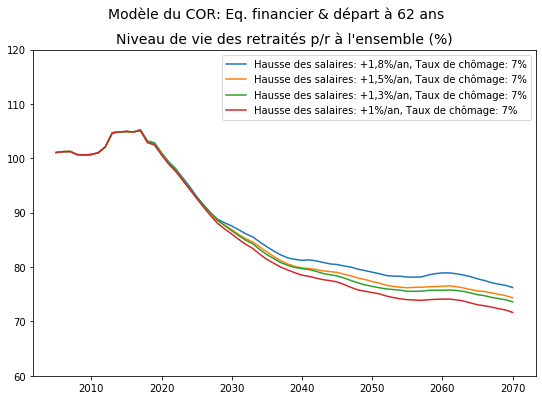

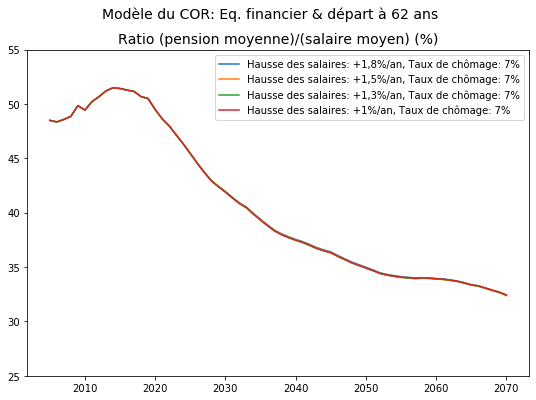

In [13]:
simulateur = SimulateurRetraites('retraites/fileProjection.json')
print("Données et figures pour article 3")

analyse = simulateur.pilotageParCotisationsEtAge(62) 

titre=u"Modèle du COR: Eq. financier & départ à 62 ans"

pl.figure(figsize=(9,6))
analyse.graphique(analyse.RNV,"RNV",14,[],True,range(1,5))
pl.suptitle(titre,fontsize=14)
pl.legend(loc="best")
analyse.mysavefig("macron_62_ans_nv")

pl.figure(figsize=(9,6))
analyse.graphique(analyse.P,"P",14,[],True,range(1,5))
pl.suptitle(titre,fontsize=14)
pl.legend(loc="best")
analyse.mysavefig("macron_62_ans_p")

In [14]:
print("Réforme Macron, Départ à 62 ans")
analyse.affiche_solutions_simulateur_COR()
print("\nEvolution du niveau de vie:")
analyse.affiche_variable(analyse.RNV)
print("\nEvolution du ratio pension/salaire:")
analyse.affiche_variable(analyse.P)

Réforme Macron, Départ à 62 ans
Valeur à rentrer sur le simulateur officiel du COR:

Scenario 1 :  Hausse des salaires: +1,8%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 62.0 ans, 30.8 %, 49.5 %
 2025 : 62.0 ans, 30.2 %, 45.5 %
 2030 : 62.0 ans, 30.0 %, 41.9 %
 2040 : 62.0 ans, 29.7 %, 37.6 %
 2050 : 62.0 ans, 29.4 %, 35.0 %
 2060 : 62.0 ans, 29.1 %, 34.0 %
 2070 : 62.0 ans, 28.9 %, 32.4 %

Scenario 2 :  Hausse des salaires: +1,5%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 62.0 ans, 30.8 %, 49.5 %
 2025 : 62.0 ans, 30.2 %, 45.5 %
 2030 : 62.0 ans, 30.0 %, 41.9 %
 2040 : 62.0 ans, 29.7 %, 37.5 %
 2050 : 62.0 ans, 29.4 %, 34.9 %
 2060 : 62.0 ans, 29.1 %, 33.9 %
 2070 : 62.0 ans, 29.0 %, 32.4 %

Scenario 3 :  Hausse des salaires: +1,3%/an, Taux de chômage: 7%
Annéee, Age,      Cotis., Pension:
 2020 : 62.0 ans, 30.8 %, 49.5 %
 2025 : 62.0 ans, 30.2 %, 45.4 %
 2030 : 62.0 ans, 30.0 %, 41.9 %
 2040 : 62.0 ans, 29.7 %, 37.5 %
 2050 : 62.0 ans, 2